In [1]:
import utils as utils

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

import importlib
importlib.reload(utils)

<module 'utils' from '/Users/AGANGOPA/Desktop/programming/001-upgrad/sessions/012-advanced-regression-assignment/utils.py'>

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_info_columns', 500)

In [3]:
# Set the global font properties
mpl.rcParams['axes.labelweight'] = 'bold'  # For axis labels
mpl.rcParams['axes.titleweight'] = 'bold'  # For titles

In [4]:
df = pd.read_csv(r'train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean    730.500000    56.897260    70.049958   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.685262   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.506164     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std     421.610009    42.300571    24.284752    9981.264932     1.382997     1.112799    30.202904     20.645407   181.066207   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    24.689725     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min       1.000000    20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%     365.750000    20.000000    59.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1961.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%     730.500000    50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   166.000000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2002.000000     2.000000   576.000000   168.000000    68.000000       0.00000

In [8]:
print(df.duplicated().sum())

0


**dataset does not contain any duplicate row**

In [9]:
# Remove the 'Id' column from the dataframe, as it's unique in every row, therefore not needed for analysis or modeling.
df.drop(columns=['Id'], axis=1, inplace=True)

In [10]:
# Checking unique values
utils.find_uniq_vals(df)

Unique values in MSZoning:
['RL' 'RM' 'C (all)' 'FV' 'RH']


Unique values in Street:
['Pave' 'Grvl']


Unique values in Alley:
[nan 'Grvl' 'Pave']


Unique values in LotShape:
['Reg' 'IR1' 'IR2' 'IR3']


Unique values in LandContour:
['Lvl' 'Bnk' 'Low' 'HLS']


Unique values in Utilities:
['AllPub' 'NoSeWa']


Unique values in LotConfig:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


Unique values in LandSlope:
['Gtl' 'Mod' 'Sev']


Unique values in Neighborhood:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


Unique values in Condition1:
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']


Unique values in Condition2:
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']


Unique values in BldgType:
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


Unique values in House

# Missing Value treatment

In [11]:
missing_values = utils.analyze_missing_vals(df)
missing_values

Missing Count  Missing Percentage
PoolQC                 1453           99.520548
MiscFeature            1406           96.301370
Alley                  1369           93.767123
Fence                  1179           80.753425
MasVnrType              872           59.726027
FireplaceQu             690           47.260274
LotFrontage             259           17.739726
GarageType               81            5.547945
GarageYrBlt              81            5.547945
GarageFinish             81            5.547945
GarageQual               81            5.547945
GarageCond               81            5.547945
BsmtFinType2             38            2.602740
BsmtExposure             38            2.602740
BsmtFinType1             37            2.534247
BsmtCond                 37            2.534247
BsmtQual                 37            2.534247
MasVnrArea                8            0.547945
Electrical                1            0.068493

In [12]:
# Columns where "NA" has a specific meaning and should be replaced with "None"
columns_with_na_level = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
    'Fence', 'MiscFeature', 'MasVnrType'
]

# Replace "NA" with "None" in the specified columns
for column in columns_with_na_level:
    df[column] = df[column].fillna('None')

In [13]:
missing_values = utils.analyze_missing_vals(df)
missing_values

Missing Count  Missing Percentage
LotFrontage            259           17.739726
GarageYrBlt             81            5.547945
MasVnrArea               8            0.547945
Electrical               1            0.068493

In [14]:
# LotFrontage: Impute with the median of the neighborhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [15]:
# Set 'GarageYrBlt' to 0 for homes without a garage, then impute missing values with the median year of garages built in the same year as the house.
df.loc[(df['GarageYrBlt'].isnull()) & (df['GarageType'] == 'None'), 'GarageYrBlt'] = 0
df['GarageYrBlt'] = df.groupby('YearBuilt')['GarageYrBlt'].transform(lambda x: x.fillna(x.median()))

In [16]:
df[df['MasVnrType'] == 'None'].head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
1          20       RL         80.0     9600   Pave  None      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0   None   None        None        0       5    2007       WD        Normal     181500
3          70       RL         60.0     9550   Pave  None      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756    GasA        Gd          Y      SBrkr       961       756             0       1717             1             0         1         0             3             1          Gd             7        Typ           1          Gd     Detchd       1998.0          Unf           3         642         TA         TA          Y           0           35            272          0            0         0   None   None        None        0       2    2006       WD       Abnorml     140000
5          50       RL         85.0    14115   Pave  None      IR1         Lvl    AllPub    Inside       Gtl      Mitchel       Norm       Norm     1Fam     1.5Fin            5            5       1993          1995     Gable  CompShg     VinylSd     VinylSd       None         0.0        TA        TA       Wood       Gd       TA           No          GLQ         732          Unf           0         64          796    GasA        Ex          Y      SBrkr       796       566             0       1362             1             0         1         1             1             1          TA             5        Typ           0        None     Attchd       1993.0          Unf           2         480         TA         TA          Y          40           30              0        320            0         0   None  MnPrv        Shed      700      10    2009       WD        Normal     143000
8          50       RM         51.0     6120   Pave  None      Reg         Lvl    AllPub    Inside       Gtl      OldTown     Artery       Norm     1Fam     1.5Fin            7            5       1931          1950     Gable  CompShg     BrkFace     Wd Shng       None         0.0        TA        TA     BrkTil       TA       TA           No          Unf           0          Unf           0        952          952    GasA        Gd 

In [17]:
# For houses with 'MasVnrType' marked as 'None', set their 'MasVnrArea' to 0, indicating no masonry veneer area.
df.loc[df['MasVnrType'] == 'None', 'MasVnrArea'] = 0

In [18]:
# Electrical column value is missing only for one row. Hence, deleting it
df = df.dropna(subset=['Electrical'])

In [19]:
missing_values = utils.analyze_missing_vals(df)
missing_values

Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []

**Finally, data set does not contain any missing value**

# EDA

## Univariate Analysis of the categorical data

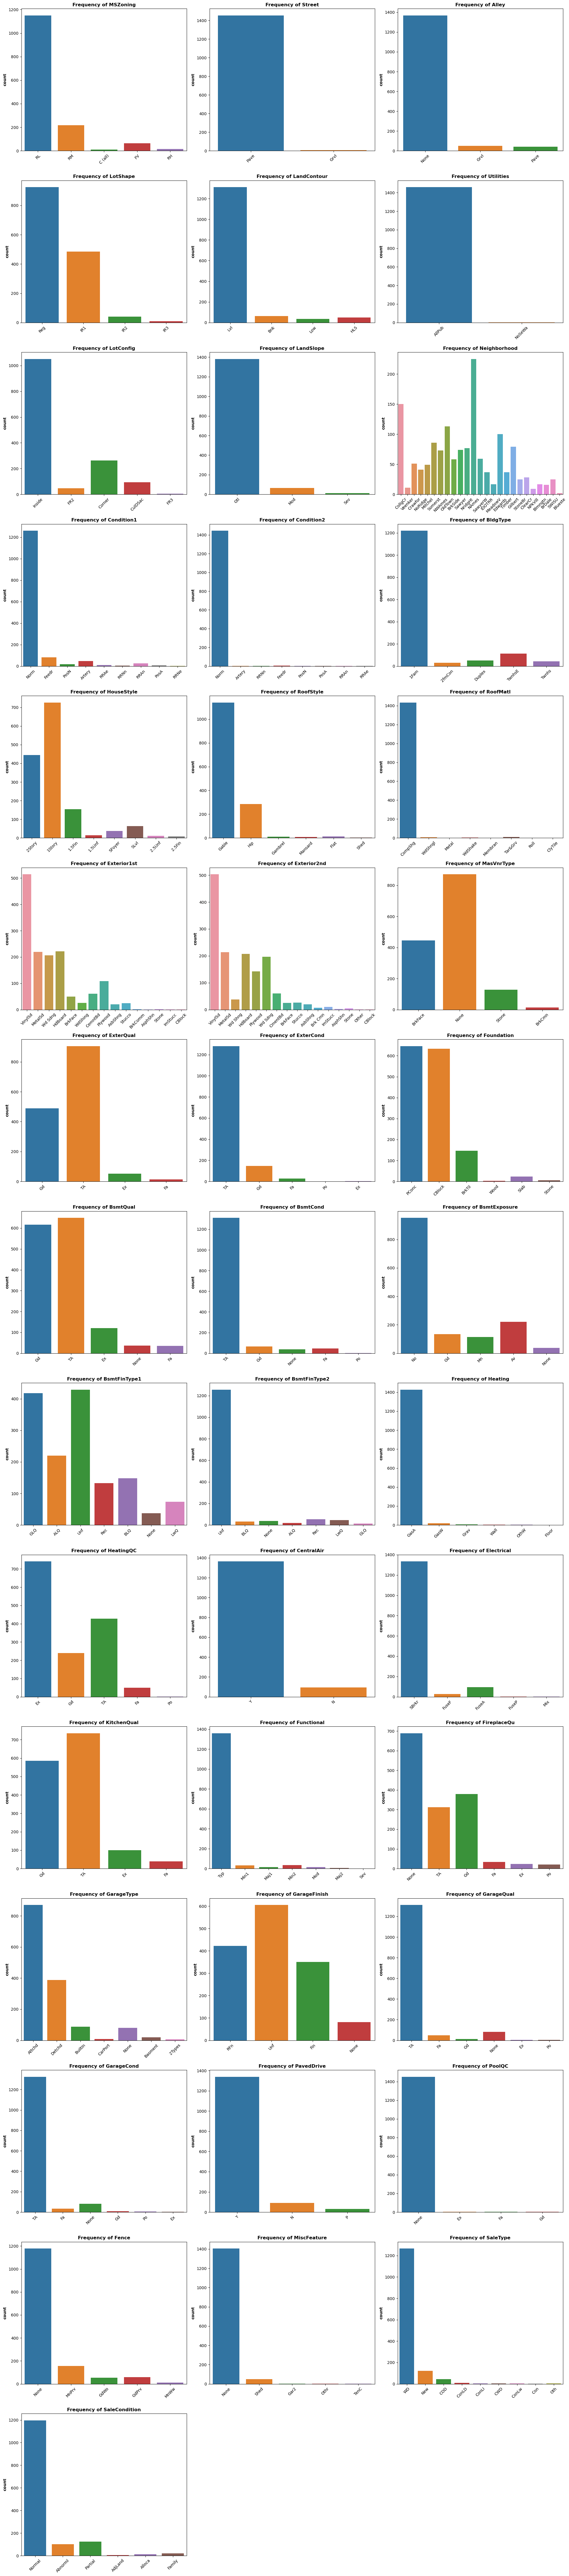

In [20]:
utils.eda_categorical(df)

## Univariate Analysis of the numeric data

In [21]:
utils.eda_numeric(df)

**Target variable SalePrice is skewed towards the right. Performing log transformation**

In [22]:
df['SalePrice'] = np.log(df['SalePrice'])

In [23]:
sns.histplot(df['SalePrice'], kde=True)

plt.show()

**SalePrice is normally distributed now**

## Bivariate Analysis of the categorical data

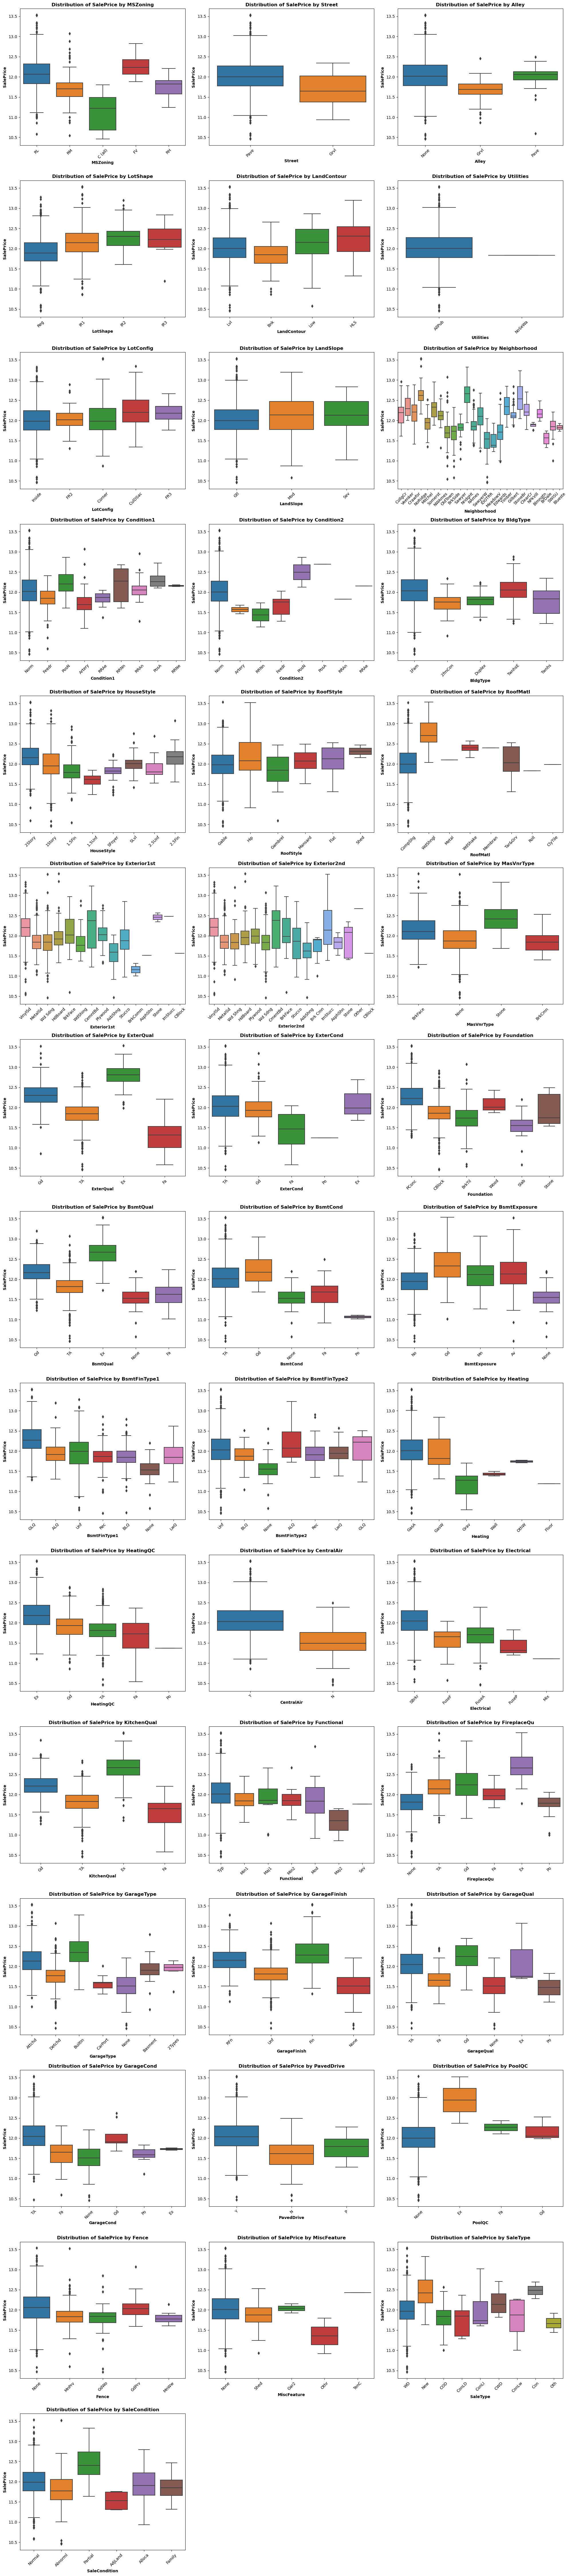

In [24]:
utils.bivariate_eda_categorical(df, 'SalePrice')

## Bivariate Analysis of the numerical data

In [25]:
utils.bivariate_eda_numeric(df, 'SalePrice')

## Multivariate Analysis

In [26]:
utils.plot_correlation_matrix(df, 'Correlation Matrix of Numerical Features')

## Inferences from EDA
Class Imbalance: Dominant categories within variables may skew predictive models, suggesting a need for balancing techniques to improve model fairness and accuracy.

Sparse and High-Cardinality Features: Rare categories and variables with many categories complicate the model, indicating potential benefits from combining sparse classes and reducing dimensionality.

Numerical Variable Skewness: Right-skewed distributions of numerical variables hint at the need for data transformation to enhance model performance.

Outlier Impact: Outliers present in numerous variables could influence model predictions, requiring careful assessment and potential data cleaning.

Feature Engineering Opportunity: The diversity in category frequencies across variables points to opportunities for creating interaction terms and investigating variable combinations for enriched modeling.



Linear Relationships: Some variables exhibit a clear linear relationship with SalePrice, as evidenced by the concentration of data points along a line. This suggests that these variables can be strong predictors for linear regression models.

Category Impact: Variations in SalePrice across different categorical levels highlight the potential strong influence of categorical variables on property values.

Predictive Indicators: Categories with consistently higher median SalePrice values suggest their importance as potential predictors for higher property valuation models.

Outliers' Role: Outliers within specific categories need careful scrutiny due to their potential to skew predictions or reveal valuable insights into property value extremes.

Data Point Distribution: Wider SalePrice spreads within sparsely represented categories may indicate data representation issues or true variability, affecting modeling approaches.

Multicollinearity: Several columns exhibit a strong correlation amongst themselves.
- The target variable, SalePrice, shows a significant correlation with GrLivArea, GarageCars, and GarageArea.
- Given the presence of multicollinearity among the predictors in our dataset, employing Ridge Regression would be beneficial.

# Label Encoding

**Since these features are ordinal in nature, mapping them with specific values preserves the correct ordinality, instead of using a blind label encoding which might not accurately reflect their inherent ordered relationship.**

In [27]:
ordinal_mappings = {
    'LotShape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
    'LandContour': {'Lvl': 4, 'Bnk': 3, 'HLS': 2, 'Low': 1},
    'Utilities': {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1},
    'LandSlope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'BsmtQual': {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'None': 0},
    # 'BsmtCond': {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'None': 0},
    'BsmtExposure': {'Gd': 5, 'Av': 4, 'Mn': 3, 'No': 2, 'None': 0},
    'BsmtFinType1': {'GLQ': 7, 'ALQ': 6, 'BLQ': 5, 'Rec': 4, 'LwQ': 3, 'Unf': 2, 'None': 0},
    'BsmtFinType2': {'GLQ': 7, 'ALQ': 6, 'BLQ': 5, 'Rec': 4, 'LwQ': 3, 'Unf': 2, 'None': 0},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'FireplaceQu': {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'None': 0},
    'GarageFinish': {'Fin': 4, 'RFn': 3, 'Unf': 2, 'None': 0},
    'GarageQual': {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'None': 0},
    'GarageCond': {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, 'None': 0},
    # 'PoolQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'None': 0},
    'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1},
    'CentralAir': {'Y': 1, 'N': 0},
    'OverallQual': {i: i for i in range(1, 11)},  # 10 down to 1
    'OverallCond': {i: i for i in range(1, 11)},  # 10 down to 1
}

In [28]:
for feature, mapping in ordinal_mappings.items():
    df[feature] = df[feature].replace('None', 0).map(mapping).fillna(0).astype('Int64')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   Int64  
 7   LandContour    1459 non-null   Int64  
 8   Utilities      1459 non-null   Int64  
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   Int64  
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   Int64  
 17  OverallCond    1459 non-null   Int64  
 18  YearBuilt    

In [30]:
# converting it to string so that one-hot encoding later creates a new binary column for each unique value in MSSubClass, appropriately reflecting its status as a nominal variable without implying any ordinality.
df['MSSubClass'] = df['MSSubClass'].astype(str)

In [31]:
df['GarageYrBlt'] = df['GarageYrBlt'].astype('Int64')

# Creating Interaction Features

In [32]:
# Convert the 'Heating' categorical variable into multiple binary variables, one for each heating type.
heating_types = df['Heating'].unique()
for heating_type in heating_types:
    df[f'Heating_{heating_type}'] = (df['Heating'] == heating_type).astype(int)

# Remove the original 'Heating' column as its information is now represented in the binary variables.
df.drop(columns=['Heating'], inplace=True)

# Create interaction terms between each binary heating type variable and 'CentralAir', to capture the combined effect of heating types and the presence of central air conditioning on the property's appeal or value.
for heating_type in heating_types:
    df[f'Heating_{heating_type}_CentralAir'] = df[f'Heating_{heating_type}'] * df['CentralAir']

# Further, create interaction terms between each heating type and 'HeatingQC', to assess the impact of heating quality within each heating type category, potentially highlighting differences in how heating quality affects properties with different heating systems.
for heating_type in heating_types:
    df[f'Heating_{heating_type}_HeatingQC'] = df[f'Heating_{heating_type}'] * df['HeatingQC']

In [33]:
# Multiplying Heating quality by Central Air presence to emphasize the combined effect on property value.
df['HeatingQC_CentralAir'] = df['HeatingQC'] * df['CentralAir']

# Creating an interaction feature to capture properties with high-efficiency gas heating and central air conditioning.
df['HighEff_Heating_CentralAir'] = df['Heating_GasA'] * df['HeatingQC'] * df['CentralAir']

# Interaction between the year a house was built and its overall quality, capturing the value of newer, high-quality homes.
df['YearBuilt_OverallQual'] = df['YearBuilt'] * df['OverallQual']

# Combining total basement square footage with first floor square footage to reflect total living space below and above ground.
df['TotalBsmtSF_1stFlrSF'] = df['TotalBsmtSF'] * df['1stFlrSF']

# Multiplying living area by the number of rooms above ground to emphasize properties with ample living space and rooms.
df['GrLivArea_TotRmsAbvGrd'] = df['GrLivArea'] * df['TotRmsAbvGrd']

# Interaction feature for the number of fireplaces and their quality, highlighting homes with high-quality fireplaces.
df['Fireplaces_FireplaceQu'] = df['Fireplaces'] * df['FireplaceQu']

# Multiplying lot area by lot frontage to gauge the overall size and appeal of the property's exterior.
df['LotArea_LotFrontage'] = df['LotArea'] * df['LotFrontage']

# Combining open porch area with wood deck square footage to capture the total value of outdoor living spaces.
df['OpenPorchSF_WoodDeckSF'] = df['OpenPorchSF'] * df['WoodDeckSF']

# Interaction of the year of remodeling and the overall condition, reflecting the impact of updates on well-maintained homes.
df['YearRemodAdd_OverallCond'] = df['YearRemodAdd'] * df['OverallCond']

# Multiplying garage cars by garage area to emphasize homes with spacious and multiple car capacities.
df['GarageCars_GarageArea'] = df['GarageCars'] * df['GarageArea']

# Interaction feature for the number of bedrooms and full baths, indicating the balance of sleeping to bathing facilities.
df['Bedroom_FullBath'] = df['BedroomAbvGr'] * df['FullBath']

# Calculating total square footage as the sum of first and second floor and basement areas for a comprehensive property size measure.
df['TotalSqFt'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

# Calculating total outdoor space to capture the full extent of usable exterior areas.
df['TotalOutdoorSF'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

# Multiplying overall quality by living area to emphasize larger, high-quality homes.
df['OverallQual_GrLivArea'] = df['OverallQual'] * df['GrLivArea']

# Calculating the ratio of outdoor space to lot area to understand the proportion of outdoor amenities.
df['OutdoorSpaceRatio'] = df['TotalOutdoorSF'] / df['LotArea']

# Multiplying garage quality by the number of cars it can hold to emphasize garages that are both spacious and high-quality.
df['GarageQual_Cars'] = df['GarageQual'] * df['GarageCars']

# Creating a feature to highlight homes with central air and newer heating systems, focusing on modern amenities.
df['CentralAir_NewerSystem'] = df['CentralAir'] * (df['HeatingQC'] * (df['YearBuilt'] > 1980)).astype(int)


In [34]:
# Calculate the age of the property at the time of sale by subtracting the year built from the year sold, providing insight into the property's age.
df['Age'] = (df['YrSold'] - df['YearBuilt']).astype(int)

In [35]:
# Calculate the age of the most recent remodel at the time of sale, which can indicate the recency of updates and potentially the property's condition.
df['RemodelAge'] = (df['YrSold'] - df['YearRemodAdd']).astype(int)

In [36]:
# Create a binary indicator for whether the property was recently remodeled (within the last 10 years), which might enhance its appeal or value.
df['RecentRemodel'] = (df['RemodelAge'] < 10).astype(int) 

In [37]:
# Remove the original columns related to the year sold, year built, and year of the last remodel, as their information has been captured in the new features.
df.drop(['YrSold', 'YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)

In [38]:
# Apply one-hot encoding to the DataFrame 'df' for all categorical variables except 'Heating', as 'Heating' was previously encoded into multiple binary variables to capture the presence of different heating systems.
no_one_hot_encode = ['Heating']
df = utils.one_hot_encode(df, no_one_hot_encode)

In [39]:
df.head()

LotFrontage  LotArea  Street  LotShape  LandContour  Utilities  LandSlope  OverallQual  OverallCond  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  SalePrice  Heating_GasA  Heating_GasW  Heating_Grav  Heating_Wall  Heating_OthW  Heating_Floor  Heating_GasA_CentralAir  Heating_GasW_CentralAir  Heating_Grav_CentralAir  Heating_Wall_CentralAir  Heating_OthW_CentralAir  Heating_Floor_CentralAir  Heating_GasA_HeatingQC  Heating_GasW_HeatingQC  Heating_Grav_HeatingQC  Heating_Wall_HeatingQC  Heating_OthW_HeatingQC  \
0         65.0     8450       1         4            4          4          3            7            5       196.0          4          3         5             2             7         706             2           0        150          856          5           1       856       854             0       1710             1             0         2         1             3             1            4             8           8           0            0         2003             3           2         548           4           4           0           61              0          0            0         0        0       2  12.247694             1             0             0             0             0              0                        1                        0                        0                        0                        0                         0                       5                       0                       0                       0                       0   
1         80.0     9600       1         4            4          4          3            6            8         0.0          3          3         5             5             6         978             2           0        284         1262          5           1      1262         0             0       1262             0             1         2         0             3             1            3             6           8           1            4         1976             3           2         460           4           4         298            0              0          0            0         0        0       5  12.109011             1             0             0             0             0              0                        1                        0                        0                        0                        0                         0                       5                       0                       0                       0                       0   
2         68.0    11250       1         3            4          4          3            7            5       162.0          4          3         5             3             7         486             2           0        434          920          5           1       920       866             0       1786             1             0         2         1             3             1            4             6           8           1            4         2001             3           2         608           4           4           0           42              0          0            0         0        0       9  12.317167             1             0             0             0             0              0                        1                        0                        0                        0                        0                         0                       5                       0                       0                       0                       0   
3         60.0     9550       1         3            4          4          3   

In [40]:
df.shape

(1459, 253)

# Splitting into train and test sets

In [41]:
X = df.drop('SalePrice', axis=1)  # Features: all columns except 'SalePrice'
y = df['SalePrice']  # Target: 'SalePrice'

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1167, 252)
(292, 252)
(1167,)
(292,)


# Scaling Training and Testing Data Features

In [44]:
# List of column names from ordinal_mappings to exclude from scaling
ordinal_columns = list(ordinal_mappings.keys())

# Separate the features into features to be scaled and features to remain unscaled
X_train_to_scale = X_train.drop(columns=ordinal_columns)
X_train_not_to_scale = X_train[ordinal_columns]

X_test_to_scale = X_test.drop(columns=ordinal_columns)
X_test_not_to_scale = X_test[ordinal_columns]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data (only on the to-be-scaled features)
scaler.fit(X_train_to_scale)

# Transform both training and testing sets (only the to-be-scaled features)
X_train_scaled_1 = scaler.transform(X_train_to_scale)
X_test_scaled_1 = scaler.transform(X_test_to_scale)

# Convert the scaled arrays back to DataFrames to make recombination easier
X_train_scaled_df = pd.DataFrame(X_train_scaled_1, columns=X_train_to_scale.columns, index=X_train_to_scale.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled_1, columns=X_test_to_scale.columns, index=X_test_to_scale.index)

# Combine the scaled and unscaled features back into a single DataFrame
X_train_scaled = pd.concat([X_train_scaled_df, X_train_not_to_scale], axis=1)
X_test_scaled = pd.concat([X_test_scaled_df, X_test_not_to_scale], axis=1)

# Ridge Model

In [45]:
# Initialize Ridge Regression model
ridge = Ridge(max_iter=10000)

In [46]:
# Define the grid of hyperparameters to search
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]  # Example range, adjust based on your needs
}

In [47]:
# Set up GridSearchCV
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, 
                           cv=5,  # Number of folds in cross-validation
                           scoring='neg_mean_absolute_error',  # You can change this to another scoring metric
                           return_train_score=True,
                           verbose=1)  # Prints out progress


In [48]:
# Fit GridSearchCV to the scaled training data
grid_search_ridge.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(max_iter=10000),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
# Best hyperparameter setting
best_alpha = grid_search_ridge.best_params_['alpha']
print(f"Best alpha (lambda) value: {best_alpha}")

Best alpha (lambda) value: 500


*Best alpha(lambda) value is found to be 500*

In [50]:
# Best model (you can use this model for predictions or further analysis)
ridge_model = grid_search_ridge.best_estimator_
ridge_model

Ridge(alpha=500, max_iter=10000)

**Plotting the scores against varying alpha values separately from cross validation.**

In [51]:
ridge_cv_scores= pd.DataFrame(grid_search_ridge.cv_results_)

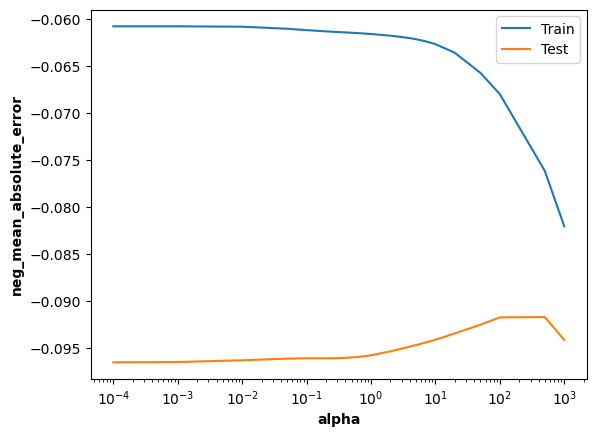

In [52]:
utils.plot_r2_vs_alpha(ridge_cv_scores)

**As the alpha value increases, the train error decreases, while the test error initially rises before decreasing. From the graph, it's evident that the optimal alpha value is 500**

In [53]:
y_train_pred_ridge = ridge_model.predict(X_train_scaled)

In [54]:
y_test_pred_ridge = ridge_model.predict(X_test_scaled)

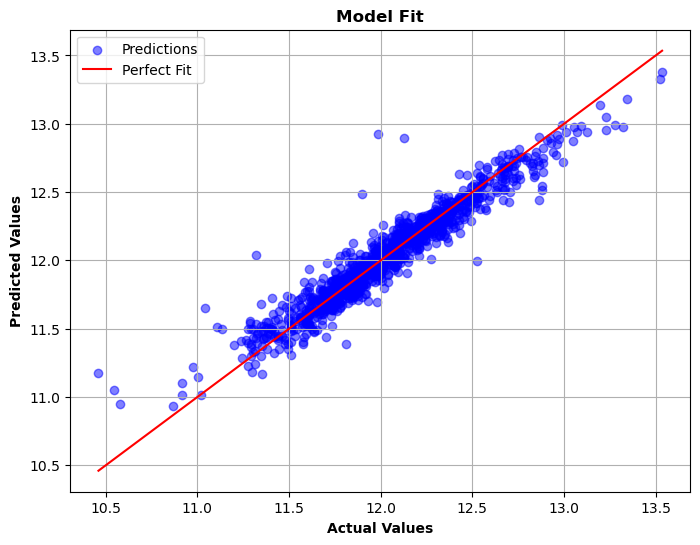

In [55]:
utils.plot_prediction_fit(y_train, y_train_pred_ridge)

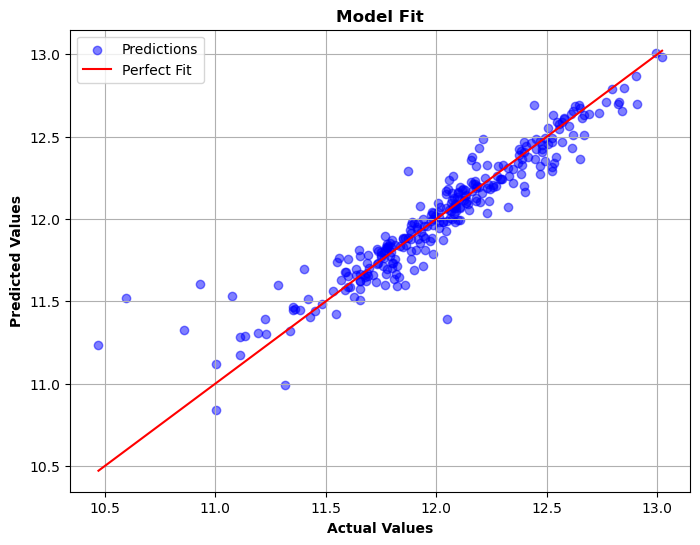

In [56]:
utils.plot_prediction_fit(y_test, y_test_pred_ridge)

## Ridge Model Metrics

In [57]:
metrics_df_ridge = utils.calculate_performance_metrics(y_train, y_train_pred_ridge, y_test, y_test_pred_ridge)
metrics_df_ridge

Metric            Train             Test
0  R-squared             0.91             0.92
1       RMSE         23938.82         21022.99
2        MSE     573066996.68     441966031.78
3        RSS  668769185128.87  129054081279.59

## Residual Analysis of Ridge Model

In [58]:
res_ridge = y_train - y_train_pred_ridge

In [59]:
utils.plot_error_terms(res_ridge, bins=20, title='Residual Analysis', xlabel='SalePrice')

**Residuals are normally distributed with significant skewness towards the left which violates linear regression assumption to some extent.**

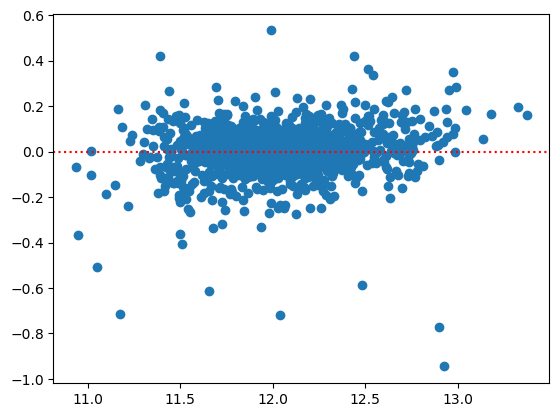

In [60]:
plt.scatter(y_train_pred_ridge, res_ridge)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

**Mostly We can see a random scatter of residuals around the horizontal axis, with no clear pattern, albeit with a bit of exception in the higher end**

## Checking the coefficients of Ridge Model

In [61]:
coefficients_table = utils.get_coefficients_table(ridge_model, X_train_scaled.columns)
coefficients_table

Feature  Coefficient
0                   OverallQual      0.02805
1                     GrLivArea      0.02212
2         YearBuilt_OverallQual      0.02020
3                     PoolQC_Gd     -0.01995
4                      1stFlrSF      0.01971
5                     TotalSqFt      0.01941
6          Neighborhood_NridgHt      0.01781
7         OverallQual_GrLivArea      0.01716
8               Condition2_PosN     -0.01696
9          Neighborhood_Crawfor      0.01612
10                 TotRmsAbvGrd      0.01595
11         Neighborhood_StoneBr      0.01448
12         TotalBsmtSF_1stFlrSF     -0.01422
13                      LotArea      0.01417
14                  OverallCond      0.01409
15        GarageCars_GarageArea      0.01378
16                MSSubClass_30     -0.01358
17     YearRemodAdd_OverallCond      0.01310
18                   RemodelAge     -0.01309
19                          Age     -0.01308
20                     FullBath      0.01290
21                 BsmtExposure      0.01275
22              GarageQual_Cars      0.01258
23                     BsmtQual      0.01225
24             Bedroom_FullBath      0.01212
25                  KitchenQual      0.01174
26          Exterior1st_BrkFace      0.01172
27                     HalfBath      0.01157
28                 BsmtFullBath      0.01155
29       CentralAir_NewerSystem      0.01105
30         SaleCondition_Alloca      0.01083
31       GrLivArea_TotRmsAbvGrd      0.01079
32         Neighborhood_Edwards     -0.01077
33         Neighborhood_NoRidge      0.01057
34                  TotalBsmtSF      0.01051
35                   GarageCars      0.01037
36              Condition1_Norm      0.01036
37                 BsmtFinType1      0.01022
38                   GarageArea      0.01015
39          Exterior1st_BrkComm     -0.01007
40         SaleCondition_Normal      0.00971
41               TotalOutdoorSF      0.00970
42                  MSZoning_RL      0.00958
43        SaleCondition_Partial      0.00949
44                   BsmtFinSF1      0.00944
45         Neighborhood_MeadowV     -0.00929
46                   Functional      0.00915
47                 SaleType_New      0.00894
48         Neighborhood_OldTown     -0.00893
49                    ExterQual      0.00893
50                  FireplaceQu      0.00885
51             RoofMatl_WdShngl      0.00884
52                     2ndFlrSF      0.00878
53             Foundation_PConc      0.00829
54               MSSubClass_160     -0.00806
55                MSSubClass_20      0.00803
56             RoofMatl_Tar&Grv      0.00771
57            LotConfig_CulDSac      0.00761
58                  MSZoning_RM     -0.00758
59                   Fence_GdWo     -0.00753
60                   MasVnrArea      0.00752
61          LotArea_LotFrontage     -0.00742
62                  ScreenPorch      0.00736
63                  BsmtCond_Fa     -0.00724
64      Heating_GasA_CentralAir      0.00720
65                 GarageFinish      0.00716
66       Fireplaces_FireplaceQu      0.00696
67         Neighborhood_ClearCr      0.00695
68               BldgType_Twnhs     -0.00692
69                  MSZoning_FV      0.00691
70                 KitchenAbvGr     -0.00684
71                   WoodDeckSF      0.00671
72         Neighborhood_Somerst      0.00665
73       OpenPorchSF_WoodDeckSF      0.00665
74            GarageType_Attchd      0.00661
75          Neighborhood_IDOTRR     -0.00655
76                MSSubClass_70      0.00636
77                   Fireplaces      0.00618
78              BldgType_TwnhsE     -0.00610
79              Condition2_Norm      0.00607
80              RoofStyle_Gable     -0.00589
81      Heating_GasW_CentralAir      0.00572
82           Neighborhood_NAmes     -0.00572
83            GarageType_Detchd     -0.00564
84         Neighborhood_BrkSide      0.00534
85                   GarageQual      0.00531
86         HeatingQC_CentralAir      0.00520
87             RoofMatl_CompShg      0.00518
88         Neighbor

# Lasso Model

In [62]:
lasso = Lasso(max_iter=10000)

In [63]:
# Set up GridSearchCV
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid,
                                    cv=5,  # Number of folds in cross-validation
                                    scoring='neg_mean_absolute_error',  # You can change this to another scoring metric,
                                    return_train_score=True,
                                    verbose=1)  # Prints out progress

In [64]:
# Fit GridSearchCV to the scaled training data
grid_search_lasso.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
# Best hyperparameter setting
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
print(f"Best alpha (lambda) value for Lasso: {best_alpha_lasso}")

Best alpha (lambda) value for Lasso: 0.001


**Best alpha(lambda) value turned out to be 0.001**

In [66]:
best_model_lasso = grid_search_lasso.best_estimator_

In [67]:
y_train_pred_lasso = best_model_lasso.predict(X_train_scaled)
y_test_pred_lasso = best_model_lasso.predict(X_test_scaled)

## Lasso Model Metrics

In [68]:
metrics_df_lasso = utils.calculate_performance_metrics(y_train, y_train_pred_lasso, y_test, y_test_pred_lasso)
metrics_df_lasso

Metric            Train             Test
0  R-squared             0.94             0.93
1       RMSE         19941.14         20009.29
2        MSE     397649092.82     400371506.86
3        RSS  464056491315.41  116908480003.62

**Plotting the scores against varying alpha values separately from cross validation.**

In [69]:
lasso_cv_scores= pd.DataFrame(grid_search_lasso.cv_results_)

In [70]:
utils.plot_r2_vs_alpha(lasso_cv_scores)

**As the alpha value increases, the train error decreases, while the test error initially rises before decreasing. From the graph, it's evident that the optimal alpha value is 0.001, after which the error remains constant**

In [71]:
utils.plot_prediction_fit(y_train, y_train_pred_lasso)

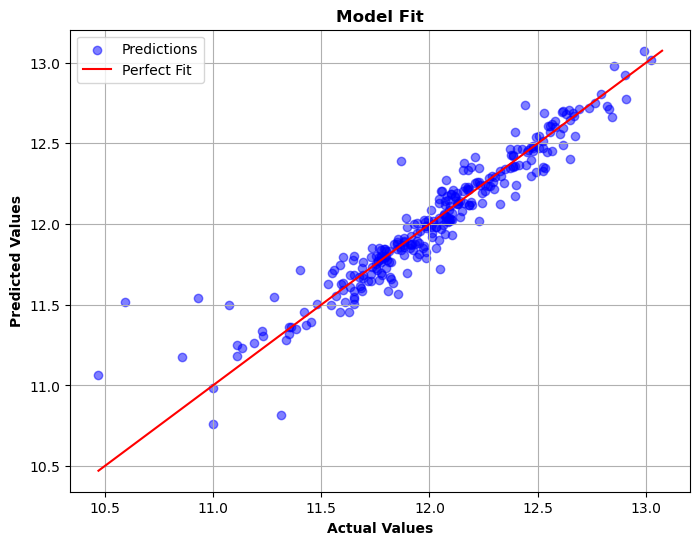

In [72]:
utils.plot_prediction_fit(y_test, y_test_pred_lasso)

## Residul Analysis of Lasso Model

In [73]:
res_lasso = y_train - y_train_pred_lasso

In [74]:
utils.plot_error_terms(res_lasso, bins=20, title='Residual Analysis', xlabel='SalePrice')

**Residuals are almost normally distributed with a mean 0 as per the above graph. All good!**

In [75]:
plt.scatter(y_train_pred_lasso, res_lasso)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

**We can see a random scatter of residuals around the horizontal axis, with no clear pattern, indicating that the model's assumptions are being met.**

## Checking the Coefficents of Lasso Model

In [76]:
coefficients_df = utils.get_coefficients_table(best_model_lasso, X_train_scaled.columns)
coefficients_df

Feature  Coefficient
0                     TotalSqFt      0.17850
1          TotalBsmtSF_1stFlrSF     -0.14521
2                           Age     -0.05957
3                      1stFlrSF      0.05916
4                   OverallQual      0.04775
5                   OverallCond      0.03616
6         GarageCars_GarageArea      0.03277
7                       LotArea      0.02755
8         SaleCondition_Partial      0.02740
9                    Functional      0.02713
10              Condition2_PosN     -0.02580
11                   BsmtFinSF1      0.02530
12         Neighborhood_NridgHt      0.02453
13         Neighborhood_Crawfor      0.02441
14         SaleCondition_Normal      0.02251
15                  MSZoning_RL      0.01893
16               TotalOutdoorSF      0.01886
17         Neighborhood_StoneBr      0.01881
18          Exterior1st_BrkFace      0.01658
19                     FullBath      0.01642
20                  MSZoning_FV      0.01599
21                   GarageQual      0.01521
22              Condition1_Norm      0.01508
23                   RemodelAge     -0.01484
24                 TotRmsAbvGrd      0.01453
25          LotArea_LotFrontage     -0.01426
26                 KitchenAbvGr     -0.01411
27                 BsmtExposure      0.01378
28         Neighborhood_BrkSide      0.01371
29                  KitchenQual      0.01302
30                 BsmtFullBath      0.01290
31       Fireplaces_FireplaceQu      0.01263
32          Exterior1st_BrkComm     -0.01251
33                     HalfBath      0.01241
34         SaleCondition_Alloca      0.01173
35         Neighborhood_NoRidge      0.01149
36                MSSubClass_20      0.01129
37      Heating_GasA_CentralAir      0.01066
38                 LowQualFinSF      0.01062
39                MSSubClass_30     -0.01047
40                    ExterQual      0.00988
41       Heating_Grav_HeatingQC     -0.00923
42                    PoolQC_Gd     -0.00889
43         Neighborhood_MeadowV     -0.00847
44             Foundation_PConc      0.00831
45      Heating_GasW_CentralAir      0.00745
46         Neighborhood_ClearCr      0.00744
47                  LandContour      0.00743
48               BldgType_Twnhs     -0.00742
49                    ExterCond     -0.00727
50                MSSubClass_70      0.00723
51               MSSubClass_160     -0.00722
52       Heating_GasA_HeatingQC      0.00720
53          Exterior2nd_HdBoard     -0.00697
54                   Fence_GdWo     -0.00691
55                  BsmtCond_Fa     -0.00689
56             RoofMatl_WdShngl      0.00679
57         Neighborhood_Edwards     -0.00648
58            LotConfig_CulDSac      0.00641
59          Exterior2nd_Plywood     -0.00590
60              RoofStyle_Gable     -0.00569
61              BldgType_TwnhsE     -0.00558
62              Condition1_RRAe     -0.00547
63            OutdoorSpaceRatio     -0.00545
64          Exterior2nd_CmentBd      0.00530
65                     BsmtQual      0.00526
66                    PoolQC_Fa     -0.00525
67                   MasVnrArea      0.00511
68         Neighborhood_Somerst      0.00511
69                  ScreenPorch      0.00507
70              Condition1_RRAn      0.00496
71                       Street      0.00443
72            MasVnrType_BrkCmn     -0.00436
73            GarageType_2Types     -0.00436
74                   Alley_Pave      0.00427
75              Foundation_Wood     -0.00421
76       Heating_Wall_HeatingQC      0.00396
77                     PoolArea      0.00386
78                 BsmtFinType1      0.00378
79               SaleType_ConLD      0.00376
80              Condition1_RRNn      0.00373
81             LotConfig_Inside     -0.00357
82         Neighborhood_Mitchel     -0.00346
83                 GarageFinish      0.00339
84         Neighborhood_Veenker      0.00337
85          Exterior2nd_Wd Shng     -0.00328
86            RoofStyle_Mansard      0.00327
87                 SaleType_CWD      0.00322
88              Con

In [77]:
# Filter the DataFrame for zeroed out coefficients
zeroed_coefficients_df = coefficients_df[coefficients_df['Coefficient'] == 0]

# Calculate the number of non-zero coefficients
non_zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] != 0]

# Automatically get and print the number of zeroed out coefficients
print(f"Number of coefficients zeroed out by Lasso: {len(zeroed_coefficients_df)}")

# Automatically get and print the number of non-zero coefficients
print(f"Number of non-zero coefficients: {len(non_zero_coefficients_df)}")

Number of coefficients zeroed out by Lasso: 101
Number of non-zero coefficients: 151


# Comparing two models

In [78]:
# Add a 'Model' column to each DataFrame to distinguish between Ridge and Lasso
metrics_df_ridge['Model'] = 'Ridge'
metrics_df_lasso['Model'] = 'Lasso'

# Concatenate the DataFrames vertically, aligning them by columns
combined_metrics_df = pd.concat([metrics_df_ridge, metrics_df_lasso], axis=0)

# If you want to reorganize the DataFrame to have 'Model' as the first column
cols = ['Model'] + [col for col in combined_metrics_df.columns if col != 'Model']
combined_metrics_df = combined_metrics_df[cols]

# Reset index if you want a clean index
combined_metrics_df.reset_index(drop=True, inplace=True)

# Print the combined DataFrame
print(combined_metrics_df)


   Model     Metric            Train             Test
0  Ridge  R-squared             0.91             0.92
1  Ridge       RMSE         23938.82         21022.99
2  Ridge        MSE     573066996.68     441966031.78
3  Ridge        RSS  668769185128.87  129054081279.59
4  Lasso  R-squared             0.94             0.93
5  Lasso       RMSE         19941.14         20009.29
6  Lasso        MSE     397649092.82     400371506.86
7  Lasso        RSS  464056491315.41  116908480003.62


# Inferences

**R-squared (Coefficient of Determination):**

- For the Ridge model, the R-squared value is 0.91 for the train set and 0.92 for the test set.
- For the Lasso model, the R-squared value is higher, indicating better fit, with 0.94 for the train set and 0.93 for the test set.

**Root Mean Squared Error (RMSE):**

- Ridge model has higher RMSE values compared to the Lasso model for both train and test sets.
- Lower RMSE values of the Lasso model indicate better predictive performance in terms of accuracy.

**Mean Squared Error (MSE):**

- The MSE values are higher for the Ridge model compared to the Lasso model, indicating higher errors.

**Residual Sum of Squares (RSS):**

- Both Ridge and Lasso models show a higher RSS for the train set compared to the test set, which is expected as the models are trained on the train set and then evaluated on the test set.
- The Lasso model generally exhibits lower RSS values compared to the Ridge model, suggesting better overall performance in terms of reducing the sum of squared residuals.

# Conclusion

- Overall, the Lasso model outperforms the Ridge model in terms of R-squared, RMSE, MSE, and RSS, indicating better predictive accuracy and model fit.
- Hence, we opt for the Lasso model.
- R-squared value for our model is 0.94 for the train set and 0.93 for the test set.
- Lambda or our model 0.001 
- The top 10 features along with the coefficients for our model are as follows
    - TotalSqFt	0.17850
    - TotalBsmtSF_1stFlrSF	-0.14521
    - Age	-0.05957
    - 1stFlrSF	0.05916
    - OverallQual	0.04775
    - OverallCond	0.03616
    - GarageCars_GarageArea	0.03277
    - LotArea	0.02755
    - SaleCondition_Partial	0.02740
    - Functional	0.02713